# Support Vector Machines

In this notebook will be some additional problems regarding SVMs. This material corresponds to `Lectures/Supervised Learning/Classification/8. Support Vector Machines`.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

##### 1. Probability from SVMs (Not a true "problem")

In `LinearSVC` or `SVC` we can set `probability=True` in order to produce a support vector machine that can also provide a probability that each observation is of class $1$. A reasonable question for you to have is, how is that probability produced?

`sklearn` uses an approach developed by John C. Platt laid out in this paper <a href="http://citeseer.ist.psu.edu/viewdoc/download;jsessionid=A825923D4C5A7E8CE0683856A9C32AF6?doi=10.1.1.41.1639&rep=rep1&type=pdf">http://citeseer.ist.psu.edu/viewdoc/download;jsessionid=A825923D4C5A7E8CE0683856A9C32AF6?doi=10.1.1.41.1639&rep=rep1&type=pdf</a>. We will give the basic idea behind this approach, but for full details read that paper.

Recall that the classification decision for a support vector machine involves calculating a decision function $f(X)$, (For a linear support vector machine this is the value of the scalar projection of the point $X$ onto the separating hyperplane). In order to produce an estimate of $P(y=1|X)$ we instead model $P(y=1|f(X))$ like so:

$$
P(y=1|f(X)) = \frac{1}{1+\exp\left(Af(X) + B\right)}.
$$

The parameters $A$ and $B$ are fit using maximum likelihood methods combined with a holdout set or cross-validation. For more in depth details see the paper.

##### 2. Multiclass SVMs

When we formulated support vector machines in lecture we presented them as a binary classification algorithm. However, support vector machines can also be used for multiclass classification.

`sklearn` approaches multiclass support vector machines with a one vs one approach. In the one vs. one approach for each possible pair of classes you train a unique support vector machine classifier. For example, if you have three classes, $1,2,3$, you would train a:
- 1 or 2 classifier,
- 1 or 3 classifier, and a
- 2 or 3 classifier.

A prediction is then made by choosing the class that is predicted the most among all of the classifiers.

For a problem with $\mathcal{C}$ possible classes, how many support vector machines are trained?

##### ANSWER

$$
{\mathcal{C} \choose 2} = \frac{\mathcal{C}!}{(\mathcal{C}-2)! 2!} = \frac{\mathcal{C}(\mathcal{C}-1)}{2}
$$

##### 3. Hinge Loss

Recall that for linear support vector machines predicting a variable $y\in\left\lbrace-1,1\right\rbrace$ using $m$ features stored in $X$ we were concerned with fitting a hyperplane:

$$
f(X) = \beta_0 + \beta_1 X_1 + \dots + \beta_m X_m,
$$

under some constraints.

In the case of the support vector classification restraints, this can more concisely be written as a single minimization problem:

$$
\min_{\beta_0, \dots, \beta_m} \left\lbrace \sum_{i=1}^n\max\left[0, 1-y^{(i)} f\left(X^{(i)}\right) \right] + \lambda \sum_{j=1}^m \beta_j^2 \right\rbrace,
$$

where $(X^{(i)},y^{(i)})$ denotes the $i^\text{th}$ observation of $n$ total training observations.

This form is similar to that of Lasso and Ridge regression where we look to minimize:

$$
L(X,y,\beta) + \lambda P(\beta)
$$

as a function of $\beta$. Here $L$ denotes a loss function and $P$ a penalty term. In regression the loss function is the MSE and the penalty is either $||\beta||_1$ or $||\beta||_2^2$. For support vector classifiers the loss function is known as the <i>hinge loss</i> and the penalty is again $||\beta||_2^2$.

Explicity the hinge loss is defined as:

$$
L(X,y,\beta) = \sum_{i=1}^n\max\left[0, 1-y^{(i)} f\left(X^{(i)}\right) \right].
$$

From this we can see that only the observations on the incorrect side of the margin impact the loss function, for those are precisely the observations with $y^{(i)} f\left(X^{(i)}\right) < 1$. Below we plot $\max\left[0, 1-y^{(i)} f\left(X^{(i)}\right) \right]$ as a function  of $y^{(i)} f\left(X^{(i)}\right)$.

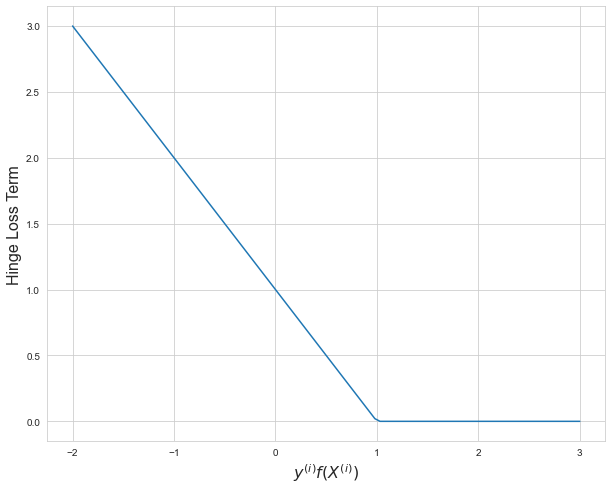

In [3]:
def hinge(x):
    return np.max([0, 1-x])

xs = np.linspace(-2,3,100)
hinges = [hinge(x) for x in xs]

plt.figure(figsize=(10,8))

plt.plot(xs, hinges)

plt.xlabel("$y^{(i)} f(X^{(i)})$", fontsize=16)
plt.ylabel("Hinge Loss Term", fontsize=16)

plt.show()

What happens to the values of $\beta_1, \dots, \beta_m$ as you increase or decrease the value of $\lambda$ in the minimization problem above?

##### ANSWER

The larger $\lambda$ is, the smaller the values of $\beta_1, \dots, \beta_m$, which in turn results in more violations of the margin. In this scenario the support vector classifier would have higher bias and lower variance.

The smaller $\lambda$ is, the larger the values of $\beta_1, \dots, \beta_m$ can be, which in turn results in fewer violations of the margin. In this scenario the support vector classifier would have lower bias and higher variance.

##### 4. Support Vector Regression

We can also use support vector machines to solve regression problems. I will use two dimensions to display the idea.

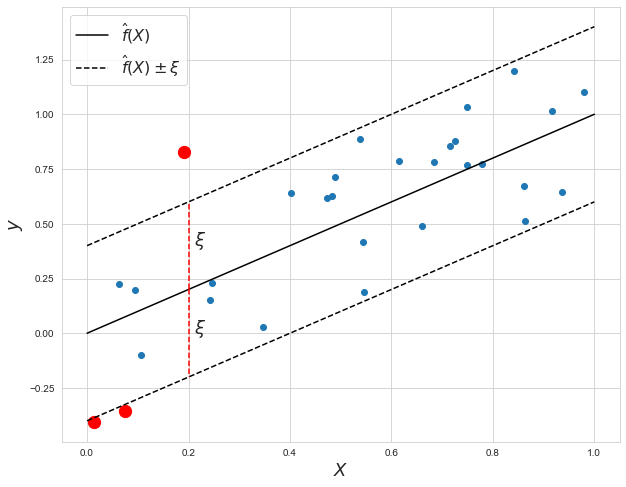

In [4]:
np.random.seed(614)
X = np.random.random(30)
y = X + .25*np.random.randn(30)

plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot([0,1], [0,1], 'k', label="$\hat{f}(X)$")
plt.plot([0,1], [.4,1.4], 'k--', label="$\hat{f}(X) \pm\\xi$")
plt.plot([0,1], [-.4,.6], 'k--')

for i in range(30):
    if np.abs(y[i]-X[i])>.4:
        plt.scatter(X[i], y[i], c='r', s=150)

plt.plot([.2,.2], [.2,.6],'r--')
plt.plot([.2,.2], [.2,-.2],'r--')

plt.text(.21,.4,"$\\xi$", fontsize=18)
plt.text(.21,0,"$\\xi$", fontsize=18)

plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.legend(fontsize=16)



plt.show()

Where we let $f(X) = \beta_0 + \beta_1 X$.

We now use this plot to help describe the idea behind support vector regression. <i>we will be doing this for estimating a linear relationship between $y$ and $X$, but we can similarly use the kernel trick to estimate nonlinear relationships between $y$ and $X$ as well.</i>

Recall that for regression we want to predict a continuous variable $y$ using a set of features $X$. In particular we want to find $f$ such that $y=f(X)+\epsilon$ for some error $\epsilon$. For a linear relationship this takes the form of:

$$
y = \beta_0 + \beta_1 X_1 + \dots + \beta_m X_m + \epsilon.
$$

We want to estimate the $\beta_i$. In support vector regression we essentially estimate by wiggling around a hyperplane to get $\hat{y}$ within $\xi$ of $y$ for as many training points as possible for a value of $\xi$ that you choose prior to fitting the model. This is visualized in the plot above for a single feature, $X$. We have some line fit to these data that is within $\xi$ of all but $3$ training points. In this example, imagine trying to rotate the solid line so that we fit as many of the training points as possible between the dotted lines. However, if we are allowed to wiggle our hyperplane around as much as we would like, we would inevitably overfit on the training data, so we have a constraint on how much we are allowed to wiggle the hyperplane. 

Formally we estimate the $\beta_i$ by minimizing:

$$
H(\beta_0, \beta_1, \dots, \beta_m|\xi, \lambda) = \sum_{i = 1}^n \max \left[ 0, | y^{(i)} - f\left(X^{(i)}\right) | - \xi \right] + \lambda \sum_{i=1}^m \beta_i^2,
$$

where $\lambda$ is a constant you choose priort to fitting the model, $f(X) = \beta_0 + \beta_1 X_1 + \dots + \beta_m X_m$ and the superscripts denote observations in the training set, which again takes the form of a loss function plus a penalty term. We can see that the only terms that contribute to the loss portion of $H$ are those for which $f\left(X^{(i)}\right)$ is further than $\xi$ away from $y^{(i)}$. Thus "we" can reduce the value of $H$ in two ways:

1. Move the hyperplane (change the value on the $\beta_i$) so that more predictions are within $\xi$ of their training observations,

2. Make the $\beta_i$ smaller in magnitude.

Which path your computer takes can be determined by the values of $\xi$ and $\lambda$. For more detailed information on how this model is fit see the Elements of Statistical Learning Chapter 12, <a href="https://web.stanford.edu/~hastie/ElemStatLearn/>https://web.stanford.edu/~hastie/ElemStatLearn/</a>.

<i>Fill in the blank questions</i>

For a fixed value of $\lambda$ increasing the value of $\xi$ <i>$<$blank$>$</i> the variance of the model and <i>$<$blank$>$</i> the bias of the model. For a fixed value of $\lambda$ decreasing the value of $\xi$ <i>$<$blank$>$</i> the variance of the model and <i>blank</i> the bias of the model.

For a fixed value of $\xi$ increasing the value of $\lambda$ <i>$<$blank$>$</i> the variance of the model and <i>blank</i> the bias of the model. For a fixed value of $\xi$ decreasing the value of $\lambda$ <i>$<$blank$>$</i> the variance of the model and <i>blank</i> the bias of the model.

##### ANSWER

For a fixed value of $\lambda$ increasing the value of $\xi$ <i>decreases</i> the variance of the model and <i>increases</i> the bias of the model. For a fixed value of $\lambda$ decreasing the value of $\xi$ <i>increases</i> the variance of the model and <i>decreases</i> the bias of the model.

For a fixed value of $\xi$ increasing the value of $\lambda$ <i>decreases</i> the variance of the model and <i>increases</i> the bias of the model. For a fixed value of $\xi$ decreasing the value of $\lambda$ <i>increases</i> the variance of the model and <i>decreases</i> the bias of the model.

##### 5. Moons and Circles Data Set

Two popular benchmark data sets are the <i>moons</i> and <i>circles</i> datasets that are plotted below.

In [5]:
from sklearn.datasets import make_moons, make_circles

In [6]:
## Moon Data set
## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
X_moons,y_moons = make_moons(1000, noise=.2)

## Circles Data Set
## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
X_circ,y_circ = make_circles(1000, noise=.2, factor=.3)

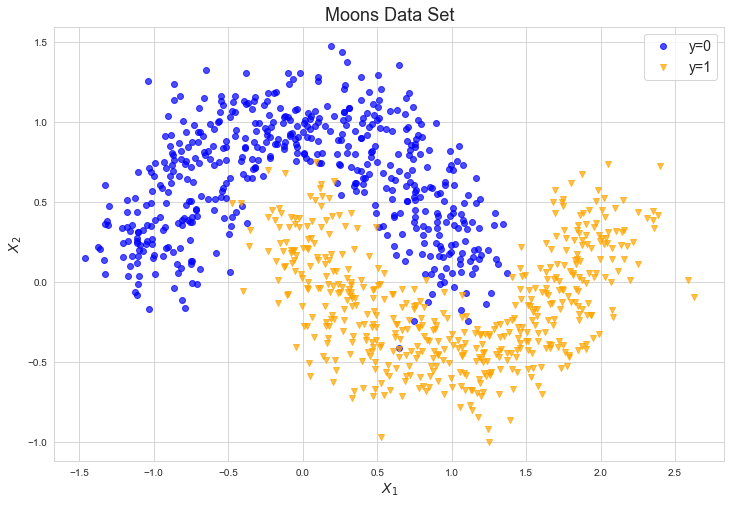

In [8]:
plt.figure(figsize=(12,8))

plt.scatter(X_moons[y_moons==0,0], X_moons[y_moons==0,1], c='blue', alpha=.7, label="y=0")
plt.scatter(X_moons[y_moons==1,0], X_moons[y_moons==1,1], c='orange', marker='v', alpha=.7, label="y=1")

plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$X_2$", fontsize=14)

plt.legend(fontsize=14)
plt.title("Moons Data Set", fontsize=18)

plt.show()

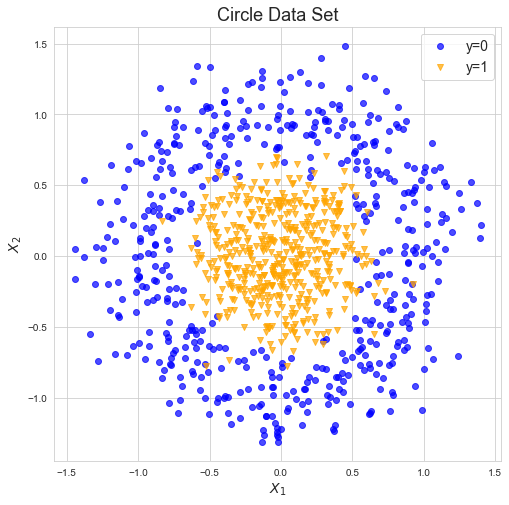

In [9]:
plt.figure(figsize=(8,8))

plt.scatter(X_circ[y_circ==0,0], X_circ[y_circ==0,1], c='blue', alpha=.7, label="y=0")
plt.scatter(X_circ[y_circ==1,0], X_circ[y_circ==1,1], c='orange', marker='v', alpha=.7, label="y=1")

plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$X_2$", fontsize=14)

plt.legend(fontsize=14)
plt.title("Circle Data Set", fontsize=18)

plt.show()

Explore different kernel functions for the `SVC` classifier and find a good one for both data sets.

<i>If you attempt to use a polynomial kernel you may want to adjust arguments like `coef0` and `degree`.</i>

In [10]:
from sklearn.svm import SVC

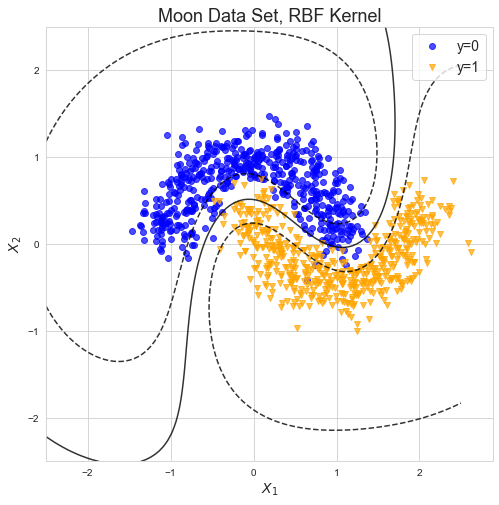

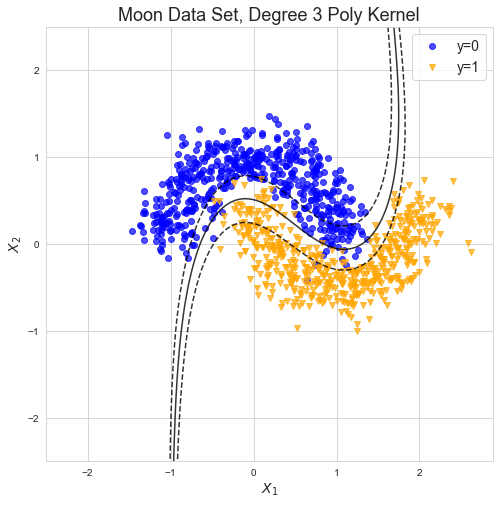

In [12]:
###### Moons
rbf_svc = SVC(kernel='rbf', gamma='auto', C=1)
poly_svc = SVC(kernel='poly', gamma='auto', coef0=2,degree=3, C=1)


rbf_svc.fit(X_moons, y_moons)
poly_svc.fit(X_moons, y_moons)


# get a grid of x1 values
x1x1 = np.linspace(-2.5, 2.5, 100)

# get a grid of x2 values
x2x2 = np.linspace(-2.5, 2.5, 100)

# arrange them in a 2D grid
X1X1, X2X2 = np.meshgrid(x1x1, x2x2)

# make a cleaner array
x1x2 = np.vstack([X1X1.ravel(), X2X2.ravel()]).T

# get the value of the decision function for this grid
Z_rbf = rbf_svc.decision_function(x1x2).reshape(X1X1.shape)
Z_poly = poly_svc.decision_function(x1x2).reshape(X1X1.shape)



plt.figure(figsize=(8,8))

plt.scatter(X_moons[y_moons==0,0], X_moons[y_moons==0,1], c='blue', alpha=.7, label="y=0")
plt.scatter(X_moons[y_moons==1,0], X_moons[y_moons==1,1], c='orange', marker='v', alpha=.7, label="y=1")


plt.contour(X1X1, X2X2, Z_rbf,
              colors='k', levels=[-1,0,1], 
              alpha=.8, linestyles=['--','-','--'])

plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$X_2$", fontsize=14)

plt.legend(fontsize=14)
plt.title("Moon Data Set, RBF Kernel", fontsize=18)

plt.show()

plt.figure(figsize=(8,8))

plt.scatter(X_moons[y_moons==0,0], X_moons[y_moons==0,1], c='blue', alpha=.7, label="y=0")
plt.scatter(X_moons[y_moons==1,0], X_moons[y_moons==1,1], c='orange', marker='v', alpha=.7, label="y=1")


plt.contour(X1X1, X2X2, Z_poly,
              colors='k', levels=[-1,0,1], 
              alpha=.8, linestyles=['--','-','--'])

plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$X_2$", fontsize=14)

plt.legend(fontsize=14)
plt.title("Moon Data Set, Degree 3 Poly Kernel", fontsize=18)

plt.show()


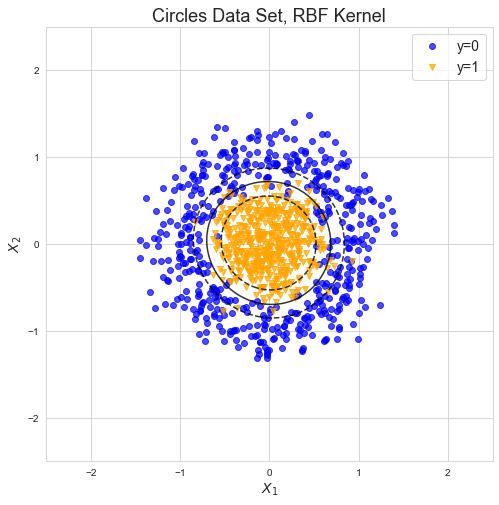

In [13]:
###### Circles
rbf_svc = SVC(kernel='rbf', gamma='auto', C=1)


rbf_svc.fit(X_circ, y_circ)


# get a grid of x1 values
x1x1 = np.linspace(-2.5, 2.5, 100)

# get a grid of x2 values
x2x2 = np.linspace(-2.5, 2.5, 100)

# arrange them in a 2D grid
X1X1, X2X2 = np.meshgrid(x1x1, x2x2)

# make a cleaner array
x1x2 = np.vstack([X1X1.ravel(), X2X2.ravel()]).T

# get the value of the decision function for this grid
Z_rbf = rbf_svc.decision_function(x1x2).reshape(X1X1.shape)



plt.figure(figsize=(8,8))

plt.scatter(X_circ[y_circ==0,0], X_circ[y_circ==0,1], c='blue', alpha=.7, label="y=0")
plt.scatter(X_circ[y_circ==1,0], X_circ[y_circ==1,1], c='orange', marker='v', alpha=.7, label="y=1")


plt.contour(X1X1, X2X2, Z_rbf,
              colors='k', levels=[-1,0,1], 
              alpha=.8, linestyles=['--','-','--'])

plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$X_2$", fontsize=14)

plt.legend(fontsize=14)
plt.title("Circles Data Set, RBF Kernel", fontsize=18)

plt.show()

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)